# Interpolação polinomial

## $ \S 1 $ Introdução

É freqüente a situação em que temos uma tabela com alguns valores de uma função desconhecida $ f $ e precisamos "ler entre as linhas" da tabela para encontrar valores de $ f $ que não foram dados.

**Exemplo 1:** Considere a tarefa de se encontrar a posição futura de um bloco que desliza sem atrito numa canaleta inclinada, e que teve sua rapidez medida em apenas dois instantes $ t_0 $ e $ t_1 $. A princípio, este problema não pode ser resolvido com as técnicas do curso de Cálculo, uma vez que não dispomos de uma *fórmula* para a função $ v(t) $ que descreve a rapidez do bloco. Como alternativa, podemos substituir $ v $ pelo único polinômio $ p $ de  grau $ 1 $ satisfazendo $ p(t_i) = v(t_i) $ $ (i=0, 1) $, e então integrar $ p $ para obter uma aproximação para a função posição.

**Definição (interpolação):** **Interpolar** uma função significa estimar valores desconhecidos ou de difícil determinação a partir de valores conhecidos.

📝 Uma minoria de autores prefere distingüir entre *interpolação* ou *extrapolação* conforme pretenda-se encontrar um valor desconhecido dentro ou fora do intervalo coberto pelos dados originais.

A **interpolação polinomial** consiste do uso de um polinômio que satisfaça os dados iniciais para obter novos dados. Para construir este polinômio, os dados iniciais mais freqüentes são:
* Valores de uma função em vários pontos (*polinômio de Lagrange*);
* Valores das sucessivas derivadas de uma função num ponto (*polinômio de Taylor*);
* Alguma combinação dos anteriores.

Observe que polinômios são especialmente convenientes como funções aproximadoras por serem facilmente avaliados, diferenciados e integrados.

## $ \S 2 $ Interpolação polinomial usando valores da função

### $ 2.1 $ Existência e unicidade do polinômio interpolador

O resultado central diz que por $ N + 1 $ pontos compatíveis, podemos ajustar um único polinômio de grau $ \le N $.

**Teorema 2.1 (existência e unicidade do polinômio interpolador):** *Dados $ N + 1 $ pontos
\begin{equation*}
(x_1, y_1)\,,\ (x_2, y_2)\,,\ \dots\,,\ (x_{N + 1}, y_{N + 1})\,,
\end{equation*}
com $ x_i \ne x_{j} $ para $ i \ne j $, existe um único polinômio de grau $ \le N $ que os interpola.*

**Demonstração da unicidade:** Suponha que $ p $ e $ q $ sejam polinômios de grau $ \le N $ cujos gráficos contêm os pontos dados. Então $ p - q $ é um polinômio de grau $ \le N $ que possui ao menos $ N + 1 $ raízes: $ x_1, x_2, \dots, x_{N + 1} $. O único polinômio com estas propriedades é o polinômio identicamente nulo, donde concluímos que $ p = q $.

**Demonstração da existência:** Seja
$$
p(x) = a_0 + a_1 x + a_2x^2 + \cdots + a_nx^N = \sum_{k=1}^N a_kx^k
$$
o polinômio procurado. Temos:
* $ N + 1 $ coeficientes indeterminados $ a_0, a_1, \dots, a_N $;
* $ N + 1 $ condições a serem satisfeitas, a saber: $ p(x_i) = y_i $ para $ i=1, \dots, N + 1 $.

Isto dá origem ao sistema de $ N + 1 $ equações
$$
\begin{cases}
a_0 &+& a_1x_1 &+& a_2x_1^2 &+& \cdots &+& a_Nx_1^N &= y_1\\
a_0 &+& a_1x_2 &+& a_2x_2^2 &+& \cdots &+& a_Nx_2^N &= y_2\\
\ \vdots &&\ \ \vdots &&\ \ \vdots && \cdots &&\ \ \vdots &\quad \vdots \\
a_0 &+& a_1x_{N+1} &+& a_2x_{N+1}^2 &+& \cdots &+& a_Nx_{N+1}^N &= y_{N+1}
\end{cases}
$$
ou, em forma matricial,
\begin{equation*}
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^N \\
1 & x_2 & x_2^2 & \cdots & x_2^N \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{N+1} & x_{N+1}^2 & \cdots & x_{N+1}^N 
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_N
\end{bmatrix}=
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_N
\end{bmatrix}
\end{equation*}
Observe que este é um sistema *linear*. As indeterminadas são os $ a_k $, e não as potências dos $ x_k $, que são conhecidas ou podem ser calculadas facilmente.

Há pelo menos dois caminhos para se mostrar que este sistema tem uma solução. O primeiro é exibi-la diretamente, o que faremos na $ \S 4 $. O segundo consiste em mostrar que a matriz $ (N + 1) \times (N + 1) $ à esquerda é invertível; isto também dá uma nova demonstração da unicidade.

O determinante desta matriz é chamado de **determinante de Vandermonde**:
$$
V = 
\begin{vmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^N \\
1 & x_2 & x_2^2 & \cdots & x_2^N \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{N+1} & x_{N+1}^2 & \cdots & x_{N+1}^N 
\end{vmatrix} = \lvert x_i^j \rvert \qquad (i=1,\dots,N+1,\ j = 0,\dots,N).
$$
Mostraremos na $ \S 5 $ que ele é não-nulo desde que $ x_i \ne x_{i'} $ para quaisquer $ i \ne i' $. Portanto o sistema linear tem uma única solução $ (a_0,a_1,\dots,a_N) $. Estes são os coeficientes do polinômio $ p $ procurado.
<div style="text-align: right">$ \blacksquare $ </div>

### $ 2.2 $ **Observações:** 

📝 Na situação do teorema, se $ y_i = f(x_i) $ para uma função $ f $, dizemos também que $ p $ **interpola $ f $ nos pontos $ x_i $**.

⚠️ O teorema *não* afirma que existe apenas um polinômio que se ajuste aos dados; ele garante apenas que existe um único polinômio *de grau $ \le N $*. De fato, sem esta restrição sobre o grau, podemos obter infinitas soluções, bastando para isto somar ao polinômio mencionado no enunciado um polinômio qualquer que se anule em $ x_1,\,x_2,\, \dots,\,x_{N + 1} $. Note que como os $ x_i $ são mutuamente distintos por hipótese, qualquer polinômio que se anule em todos eles deve ter grau pelo menos $ N + 1 $.

📝 Para aplicação do teorema, não há problema que $ y_i = y_{j} $ para algum par $ i \ne j $. Por outro lado, uma função não pode assumir dois valores diferentes num mesmo elemento do seu domínio. Portanto, se $ x_i = x_{j} $ para alguns $ i \ne j $, então não existe um polinômio que se ajuste aos dados, a não ser que também ocorra $ y_i = y_{j} $, caso em que a lista dos dados iniciais conteria repetições.

📝 O grau do polinômio interpolador será "quase sempre" exatamente igual a $ N $. Contudo, em casos excepcionais ele poderá ser menor. Por exemplo:
* Para $ N = 1 $, o polinômio interpolador terá grau $ 0 $ se e somente se $ y_0 = y_1 $;
* Para $ N = 2 $, o polinômio interpolador terá grau $ < 2 $ se e somente se os três pontos $ (x_1, y_1) $, $ (x_2, y_2) $ e $ (x_3, y_3) $ forem colineares.

📝 A maioria dos métodos numéricos de integração é baseada na interpolação polinomial. A idéia é simples: Dada uma função $ f \colon [a, b] \to \mathbb R $ cuja integral se queira calcular, subdividimos $ [a, b] $ em alguns subintervalos e, em cada um deles,  aproximamos $ f $ por um polinômio interpolador de grau fixo (que varia conforme o método). Finalmente, tomamos a soma das integrais destes polinômios, que são facilmente calculadas.

## $ \S 3 $ Problemas

**Problema 1:**

(a) Sem usar o computador, encontre o polinômio $ p $ de menor grau possível que se ajuste aos dados:

|$x$|$y$|
|---|---|
|$0$|$2$|
|$1$|$2$|
|$2$|$0$|
|$3$|$0$|

(b) Exiba um outro polinômio $ q $ que se ajusta a estes dados. É possível tomar $ q $ de mesmo grau que o de $ p $?

(c) Esboce o gráfico deste polinômio usando Python.

(d) Encontre $ p(4) $.

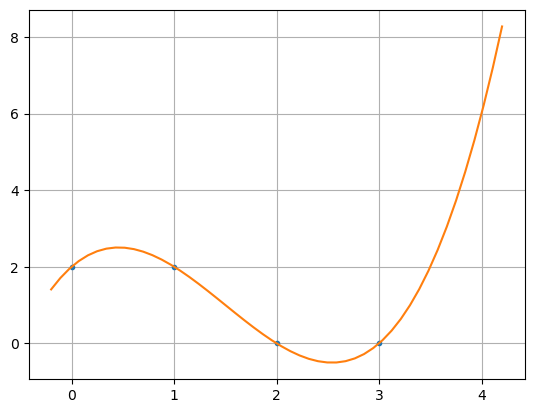

O valor de p em x = 4 é: 6.0


In [4]:
import matplotlib.pyplot as plt
import numpy as np


def p(x):
    return 2 + (7 / 3) * x - 3 * x**2 + (2 / 3) * x**3

xs = [0, 1, 2, 3]
ys = [2, 2, 0, 0]

x_grid = np.linspace(-0.2, 4.2, num=50)
plt.plot(xs, ys, '.', x_grid, p(x_grid),'-')
plt.grid()
plt.show()

print("O valor de p em x = 4 é:", p(4))

**Problema 2:** Usando Python:

(a) Encontre o polinômio interpolador (de menor grau) para $ y = \log_{10} x $ e $ x = 1, 2, 3, 4 $.

(c) Esboce o gráfico deste polinômio juntamente com o gráfico de  $ \log_{10} x $.

[[ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]
[0.0, 0.3010299956639812, 0.47712125471966244, 0.6020599913279624]
[-0.49975495  0.62371283 -0.13625558  0.0122977 ]


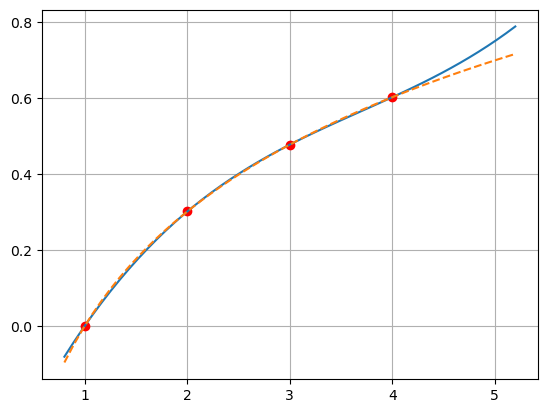

In [6]:
import numpy as np
import matplotlib.pyplot as plt


N = 3
xs = [1, 2, 3, 4]
ys = [np.log10(x) for x in xs]
A = np.array([xs[i]**j for i in range(N + 1) for j in range(N + 1)])
A = A.reshape(N + 1, N + 1)

print(A)
print(ys)
cs = np.linalg.solve(A, ys)
print(cs)

def p(x):
    return sum(cs[i] * x**i for i in range(N + 1))

x_grid = np.linspace(0.8, 5.2, num=50)
plt.plot(xs, ys, 'ro')
plt.plot(x_grid, p(x_grid), '-')
plt.plot(x_grid, np.log10(x_grid), '--')
plt.grid()
plt.show()



**Problema 3:** Usando interpolação polinomial *linear*, aproxime $ \cos(73.5^{\circ}) $ usando os valores tabelados seguintes:

(a) $ \cos(70^\circ) = 0.34202 $ e $ \cos(80^\circ) = 0.17365 $;

(b) $ \cos(73^\circ) = 0.29237 $ e  $ \cos(74^\circ) = 0.27564 $.

Os resultados obtidos servem para ilustrar que em geral a interpolação linear é adequada apenas sobre intervalos pequenos.

**Problema 4:** É dada a tabela seguinte dos valores de uma função desconhecida $ f $:

|$x$ |$f(x)$|
|----| ---- |
|$-1$| $-1$ |
|$2$ | $-4$ |
|$4$ | $4$  |

(a) Encontre o polinômio de menor grau possível que se ajusta a estes dados.

(b) Utilize-o para aproximar o zero de $ f $ no intervalo $ [-1, 4] $.

(c) Utilize-o para estimar $ \int_{-1}^4 f(x)\,dx $.

## $ \S 4 $ Fórmula de Lagrange para o polinômio interpolador

Seja
$$
\pi_i(x) = (x - x_1)(x - x_2) \cdots \widehat{(x - x_i)} \cdots (x - x_{N+1}) \qquad (i = 1, 2, \dots, N + 1).
$$

📝 A notação $ \widehat{a} $ indica que o termo $ a $ deve ser *omitido*. Portanto, $\pi_i(x) $  é o produto de todos os fatores da forma $ x-x_j $ para $ j = 1, 2, \dots, N + 1 $ exceto para $ j = i $.

Verifica-se diretamente que $ \pi_i $ é um polinômio de grau $ N $ que se anula em todos os $ x_j $, exceto em $ x_i $:
$$
\pi_i(x_j) = 0 \text{ se $i \ne j$},\ \ \text{enquanto }\pi_i(x_i) \ne 0.
$$
Dividindo por $ \pi_i(x_i) $, conseguimos garantir que o valor em $ x = x_i $ seja exatamente $ 1 $. Finalmente,

\begin{equation*}
    \boxed{p(x) = \sum_{i=1}^{N + 1} y_i\frac{\pi_i(x)}{\pi_i(x_i)} = \sum_{i=1}^{N+1}y_i \frac{(x - x_1) \cdots \widehat{(x - x_i)} \cdots (x - x_{N+1})}{(x_i - x_1) \cdots \widehat{(x_i - x_i)} \cdots (x_i - x_{N+1}) }}
\end{equation*}

tem grau $ \le N $ e assume o valor $ y_i $ em $ x = x_i $ para cada $ i = 1, 2, \dots, N + 1 $. Portanto este é o polinômio do Teorema 2.1.

Esta é a chamada **fórmula de Lagrange** (Joseph-Louis Lagrange, 1736—1813) para o polinômio que interpola os dados 
$$
(x_1, y_1)\,,\ (x_2, y_2)\,,\ \dots\,,\ (x_{N + 1}, y_{N + 1}) \qquad ( x_i \ne x_{j}  \text{ para } i \ne j )
$$
e o polinômio $ p $ também é conhecido como **polinômio (interpolador) de Lagrange**.

**Problema 3:**

(a) Use a fórmula de Lagrange para encontrar o polinômio de Lagrange que se ajusta aos pontos $ (0, 1) $, $ (1, 0) $, $ (2, 1) $ e $ (3, 0) $.

(c) Esboce o gráfico deste polinômio.

## $ \S 5 $ O determinante de Vandermonde

**Teorema (fórmula para o determinante de Vandermonde):** *Seja $ V $ o determinante de Vandermonde em $ N + 1 $ elementos $ x_i $:
$$
V = \begin{vmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^N \\
1 & x_2 & x_2^2 & \cdots & x_2^N \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{N+1} & x_{N+1}^2 & \cdots & x_{N+1}^N 
\end{vmatrix} = \lvert x_i^j \rvert \qquad (i=1,\dots,N+1,\ j = 0,\dots,N)
$$
Então
$$
\boxed{V = \prod_{i>j=1}^{N+1}(x_i-x_j)}
$$
Em particular, $ V \ne 0 $ se e somente se $ x_i \ne x_j $ para todos $ i \ne j $.*

**Demonstração:** Considere $ V = V(x_1,x_2,\dots,x_{N+1}) $ como uma função das variáveis $ x_i $. Claramente, $ V $ é um polinômio em $ x_1, x_2, \dots, x_{N + 1} $. Contando os expoentes, vemos que seu grau é
$$
0 + 1 + 2 + \dots + N = \frac{N(N + 1)}{2}.
$$
Além disto, se $ x_{N+1} = x_1 $, então a primeira e última linha coincidem, logo $ V = 0 $. Segue que $ V $ tem $ x_{N + 1} - x_1 $ como fator. Mais geralmente, se $ x_i = x_j $ para $ i > j $, então $ V $ se anula, pois neste caso a $ i $-ésima e $ j $-ésima linha são idênticas. Daí deduzimos que $ x_i - x_j $ é fator de $ V $ para quaisquer $ i > j $. Seja
$$
P = \prod_{i>j=1}^{N + 1} (x_i-x_j).
$$
Então $ P $ também é um polinômio, de grau 
$$
N + (N - 1) + \dots + 2 + 1 = \frac{N(N+1)}{2}.
$$
Como $ P $ divide $ V $, mas ao mesmo tempo eles têm o mesmo grau, deduzimos que eles diferem apenas por uma constante multiplicativa. Para encontrá-la, basta comparar o mesmo termo em ambas representações. O termo diagonal do determinante é
$$ 1 \cdot x_2 \cdot x_3^2 \cdots x_{N+1}^N .$$
O produto de todos os termos à esquerda na expressão para $ P $ é
$$ x_{N+1}^N \cdot x_N^{N-1} \cdots x_2. $$
Como eles coincidem, concluímos que $ V = P $:
$$
V(x_1,x_2,\dots,x_{N+1}) = \left\vert x_i^j \right\vert = \prod_{i>j=1}^{N + 1} (x_i-x_j) \tag*{$ \blacksquare $}
$$


## $ \S 6 $ Análise do erro na interpolação polinomial
Dadas uma função $ f \colon [a, b] \to \mathbb R $ e uma amostra de $ N + 1 $ pontos $ (x_i, y_i) $ com $ y_i = f(x_i) $, vimos como encontrar o único polinômio $ p $ de grau $ \le N $ passando por eles. Obteremos nesta seção uma expressão para o **erro**
$$ E(x) = f(x) - p(x) $$
cometido ao se aproximar $ f $ por $ p $ num ponto $ x \in [a, b] $ qualquer. Precisaremos supor que $ f $ é $ N + 1 $ vezes diferenciável.

Observe primeiramente que, como $ f $ e $ p $ assumem os mesmos valores nos $ x_i $, sua diferença se anula aí, logo podemos escrever
\begin{equation*}
f(x) - p(x) = (x -x_1)(x - x_2) \cdots (x - x_{N + 1})g(x)
\end{equation*}
para uma função $ g $ adequada. Isto segue de uma aplicação repetida do teorema de Taylor.

Agora seja $ x^\ast \in [a, b] $ um ponto arbitrário. Temos:
\begin{equation*}
f(x^\ast) - p(x^\ast) = (x^\ast -x_1)(x^\ast - x_2) \cdots (x^\ast - x_{N + 1})g(x^\ast).
\end{equation*}
Considere a função
\begin{equation*}
\varphi(x) = f(x) - p(x) - (x -x_1)(x - x_2) \cdots (x - x_{N + 1})g(x^\ast).
\end{equation*}
Então:
* $ \varphi $ se anula em $ N + 2 $ pontos $ x_1, x_2, \dots, x_{N+1} $ e $ x^\ast $.
* Logo $ \varphi' $ se anula em $ N + 1 $ pontos, pelo teorema do valor médio.
* Logo $ \varphi'' $ se anula em $ N $ pontos, pelo teorema do valor médio; e assim por diante.
* Em geral, $ \varphi^{(k)} $ se anula em (pelo menos) $ N + 2 - k $ pontos, para cada $ k = 0, 1, \dots, N + 1 $.

Em particular, $ \varphi^{(N + 1)} $ possui ao menos um zero $ \bar x $. Por outro lado, como $ p $ tem grau $ \le N $, $ p^{(N + 1)} \equiv 0 $, logo
\begin{equation*}
0 = \varphi^{(N+1)}(\bar x) = f^{(N+1)}(\bar x) - (N+1)!g(x^\ast).
\end{equation*}
Concluímos que
\begin{equation*}
g(x^\ast) = \frac{f^{(N+1)}(\bar x)}{(N+1)!}.
\end{equation*}
Substituindo isto na expressão para $ f(x^\ast) - p(x^\ast) $ e lembrando que $ x^\ast $ é arbitrário, deduzimos o seguinte resultado.

**Teorema 6.1 (fórmula para o erro na interpolação polinomial):** *Seja $ f \colon [a, b] \to \mathbb R $ uma função $ N + 1 $ vezes diferenciável e seja $ p $ o único polinômio de grau $ \le N $ que interpola $ f $ em $ x=x_1,x_2,\dots,x_{N + 1} \in [a, b] $. Então
\begin{equation}\label{E:Taylor5}
\boxed{f(x) = p(x) + (x - x_1)(x - x_2) \cdots (x - x_{N+1})\frac{f^{(N+1)}(\bar x)}{(N+1)!}}
\end{equation}
para algum $ \bar x $, que depende de $ x $, no menor intervalo contendo todos os $ x_i $ e $ x $.*

**Corolário:** *Seja $ f \colon [a, b] \to \mathbb R $ uma função $ N + 1 $ vezes diferenciável e seja $ p $ o único polinômio de grau $ \le N $ que interpola $ f $ em $ x=x_1,x_2,\dots,x_{N + 1} \in [a, b] $. Então o erro $ E(x) = f(x) - p(x) $ satisfaz:
$$
\vert E(x) \vert \le \vert x - x_1\vert \vert x - x_2 \vert \cdots \vert x - x_{N+1}\vert \frac{\max_{[a,b]}\big\vert f^{(N+1)} \big\vert}{(N+1)!} \tag*{ $\blacksquare $}
$$*